In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [2]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.37'

In [4]:
DayFolder=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Diad_Fitting_Nov22nd2022'
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

In [5]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [6]:
Diad_files=pf.get_diad_files(path=spectra_path, file_ext=file_ext, 
                            exclude_str='N',
                            exclude_str_2='FG04',
                             exclude_str_3='Sub BG',
                            exclude_str_4='Cap')
Diad_files[0:5]

['POC1.txt', 'POC10.txt', 'POC11.txt', 'POC12.txt', 'POC13.txt']

In [7]:
#config=diad_id_config
#config.approx_diad2_pos[0]
#config.approx_diad2_pos[1]

In [8]:
    # right_pos_diad2=df_sort_diad2_trim['pos'].between(config.approx_diad2_pos[0], config.approx_diad2_pos[1])
    # if any(right_pos_diad2):
    #     df_sort_diad2_rightpos=df_sort_diad2_trim.loc[right_pos_diad2]
    #     diad_2_diad=df_sort_diad2_rightpos.loc[df_sort_diad2_rightpos['height']==np.max(df_sort_diad2_rightpos['height'])]
    #     df_out=pd.DataFrame(data={'filename': filename,
    #                             'Diad2_pos': diad_2_diad['pos'],
    #                             'Diad2_height': diad_2_diad['height']})


790.8333435


,filename,Diad2_pos,Diad2_height,HB2_pos,HB2_height,Diad2_HB2_Valley_prom,C13_pos,C13_height,Diad1_pos,Diad1_height,...,Diad1_HB1_Valley_prom,Diad1_Median_Bck,Diad2_Median_Bck,Diad1_prom,Diad2_prom,HB1_prom,HB2_prom,approx_split,C13_prom,C13_HB2_prom_ratio
3,POC31.txt,1389.119077,12419.33301,1410.359982,1644.333374,10.166687,1370.459302,952.666687,1285.901945,7778.0,...,0.833343,743.0,743.583328,7035.0,11675.749682,546.333374,918.166718,103.217132,161.833344,5.673532


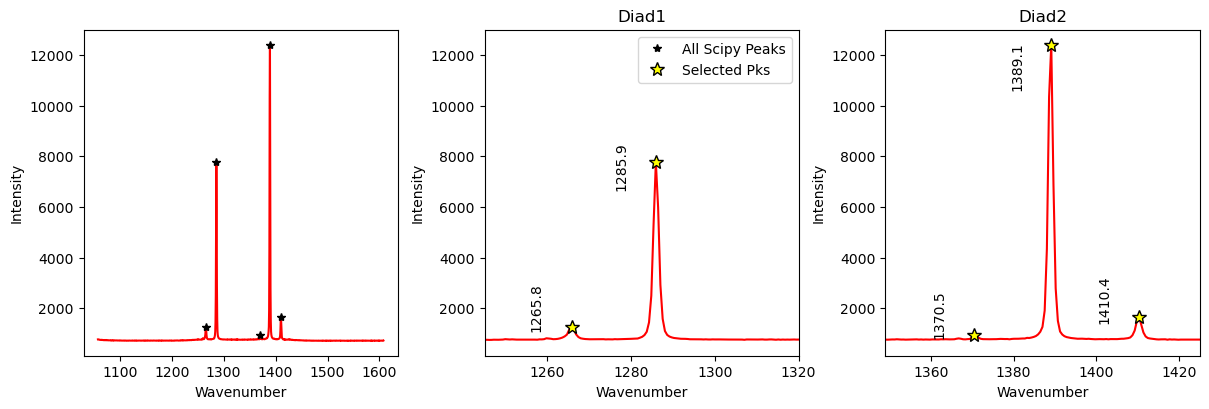

In [9]:
diad_id_config=pf.diad_id_config(height=10,  distance=10, 
                                 prominence=40)
diad_id_config

df_peaks, Diad=pf.identify_diad_peaks_2(
    config=diad_id_config, path=spectra_path, filename='POC31.txt',
filetype=filetype, plot_figure=True)

df_peaks.head()

In [10]:
fit_params = pd.DataFrame([])
all_data=np.empty([  len(Diad[:, 0]), len(Diad_files)+1], float)
all_data[:, 0]=Diad[:, 0]
#data=pd.DataFrame([])
i=0
for file in Diad_files:
    
    
    df_peaks, Diad=pf.identify_diad_peaks_2(
    config=diad_id_config, path=spectra_path, filename=file,
filetype=filetype, plot_figure=False)
    
    all_data[:, i+1]=Diad[:, 1]
    #data = pd.concat([Diad, data], axis=0)
    fit_params = pd.concat([fit_params, df_peaks], axis=0)
    i=i+1
fit_params=fit_params.reset_index(drop=True)



1400.699951
804.3999939
782.5
817.2000122
812.3999939
803.6000061
792.5
786.9000244
778.7999878
758.1000061
748.6000061
1763.8
741.7000122
760.8333435
760.3333435
750.5
751.1666565
747.333313
746.5
751.3333435
744.3333435
741.5
1714.5
737.0
790.8333435
778.6666565
785.8333435
767.333313
760.333313
755.5
747.1666565
741.3333435
733.5
1640.5
731.0
1594.199951
1554.800049
1467.8999635
1124.1000365
806.0


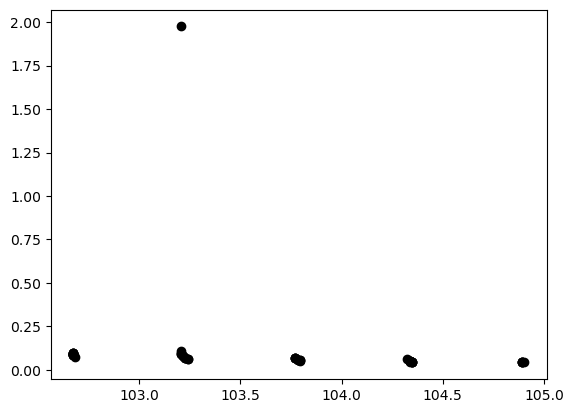

In [11]:
plt.plot(fit_params['approx_split'], 
         fit_params['HB2_prom']/fit_params['Diad2_prom'], 'ok')

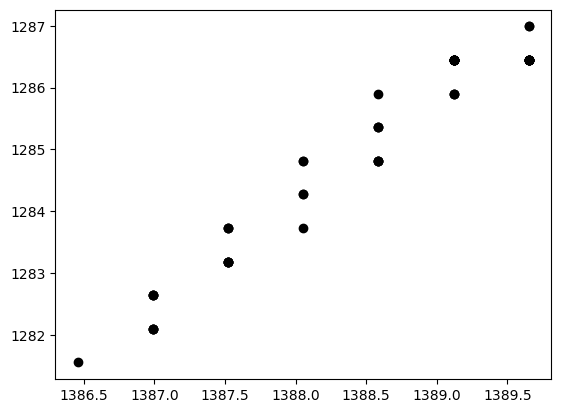

In [12]:
plt.plot(fit_params['Diad2_pos'], fit_params['Diad1_pos'], 'ok')

In [13]:
fit_params.head()

,filename,Diad2_pos,Diad2_height,HB2_pos,HB2_height,Diad2_HB2_Valley_prom,C13_pos,C13_height,Diad1_pos,Diad1_height,...,Diad1_HB1_Valley_prom,Diad1_Median_Bck,Diad2_Median_Bck,Diad1_prom,Diad2_prom,HB1_prom,HB2_prom,approx_split,C13_prom,C13_HB2_prom_ratio
0,POC1.txt,1386.457628,37218.601560,1408.239942,2384.000000,533.400024,1369.390939,1940.199951,1281.55565,20230.000000,...,352.200043,939.300018,954.100006,19290.699982,36264.501554,996.999939,1539.200012,104.901978,539.500000,2.853012
1,POC10.txt,1387.522377,8099.399902,1408.770036,1063.000000,69.899994,1369.925149,901.599976,1283.18594,4482.799805,...,50.799988,726.500000,727.100006,3756.299805,7372.299896,216.399963,353.599976,104.336437,97.199982,3.637861
2,POC11.txt,1387.522377,7094.000000,1408.770036,1018.599976,58.799988,1369.925149,874.200012,1283.18594,3874.800049,...,41.900024,720.900024,721.300018,3153.900025,6372.699982,188.599976,312.399964,104.336437,91.700012,3.406760
3,POC12.txt,1387.522377,9458.400391,1408.770036,1149.400024,76.299988,1369.925149,937.200012,1283.18594,4965.600098,...,52.299988,732.600006,733.249985,4233.000092,8725.150406,260.199951,435.700042,104.336437,120.000000,3.630834
4,POC13.txt,1387.522377,8998.799805,1408.770036,1124.400024,68.999970,1369.925149,928.599976,1283.18594,4642.200195,...,51.100006,729.900024,730.050003,3912.300171,8268.749802,245.000000,412.700042,104.336437,116.199982,3.551636


In [14]:
fit_params['has_HB2']=0
fit_params.loc[(fit_params['HB2_height']>0)&(fit_params['HB2_prom']>0), 'has_HB2']=1

fit_params['has_HB1']=0
fit_params.loc[(fit_params['HB1_height']>0)&(fit_params['HB1_prom']>0), 'has_HB1']=1




In [15]:
small_df=pd.DataFrame(data={
      'Diad1_pos':fit_params['Diad1_pos'],
     'Diad2_pos':fit_params['Diad2_pos'],
    'valley_prom': fit_params['Diad2_HB2_Valley_prom'],
    'HB_prom': fit_params['HB2_prom']+ fit_params['HB1_prom'],
    'C13_HB2_prom_ratio': fit_params['C13_height'],  
    
    
                           })
    # 'Diad1_prom': fit_params['Diad1_prom'],
    # 'Diad2_prom': fit_params['Diad2_prom'],
small_df=small_df.fillna(0)

In [17]:
# ## Can we cluster?
# from sklearn.preprocessing import StandardScaler
# from sklearn import datasets
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# # Loading dataset
# iris_df = np.array(fit_params)

# # Declaring Model
# model = KMeans(n_clusters=4)

# # Fitting Model
# data=np.array(small_df)

# scaler = StandardScaler().fit(data)
# data_scaled = scaler.transform(data)


# model.fit(data_scaled)


# # Prediction on the entire data
# all_predictions = model.predict(data_scaled)

# # Printing Predictions
# # print(predicted_label)
# # print(all_predictions)



# X = data_scaled  




# small_df['Group']=all_predictions

In [18]:
fit_params.columns

Index(['filename', 'Diad2_pos', 'Diad2_height', 'HB2_pos', 'HB2_height',
       'Diad2_HB2_Valley_prom', 'C13_pos', 'C13_height', 'Diad1_pos',
       'Diad1_height', 'HB1_pos', 'HB1_height', 'Diad1_HB1_Valley_prom',
       'Diad1_Median_Bck', 'Diad2_Median_Bck', 'Diad1_prom', 'Diad2_prom',
       'HB1_prom', 'HB2_prom', 'approx_split', 'C13_prom',
       'C13_HB2_prom_ratio', 'has_HB2', 'has_HB1'],
      dtype='object')

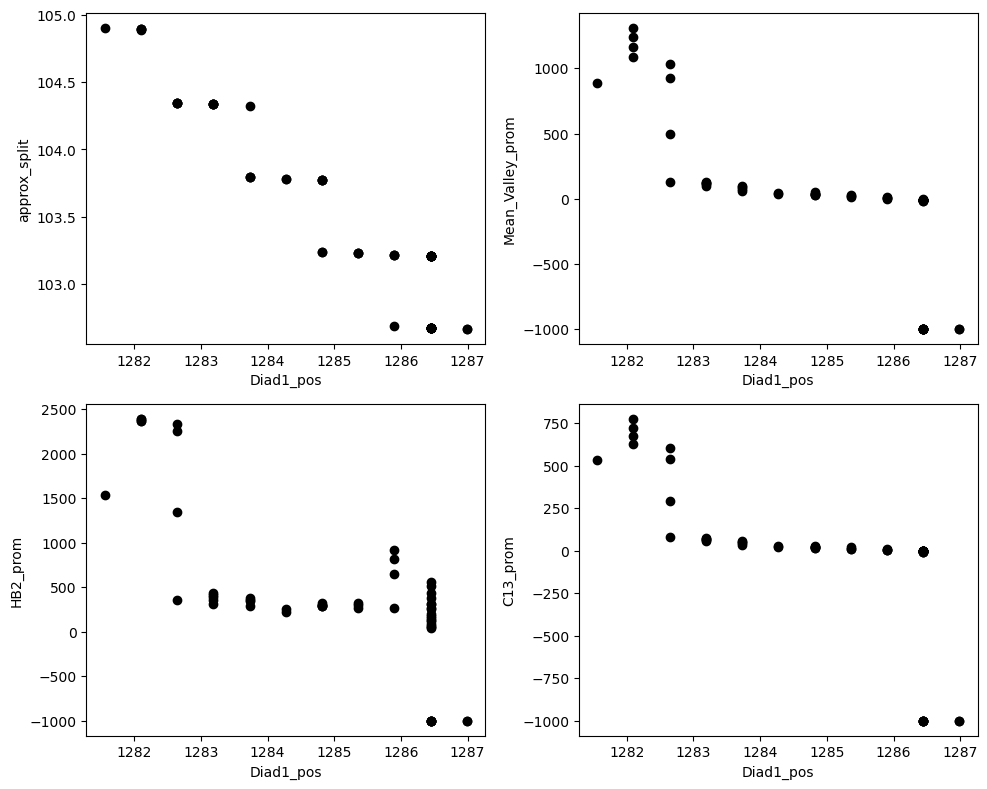

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))

var1='Diad1_pos' #Diad1 position moves more, so we want this
var2='Diad2_pos'
var3='approx_split'
fit_params['Mean_Valley_prom']=(fit_params['Diad2_HB2_Valley_prom']+fit_params['Diad1_HB1_Valley_prom'])
fit_params['Mean_HB_prom']=(fit_params['HB1_prom']+fit_params['HB2_prom'])
var4='Mean_Valley_prom'
var5='HB2_prom'
var6='C13_prom'
var7='Diad2_HB2_Valley_prom'
fit_params2=fit_params.fillna(-1000)

## Set boundaries


ax1.plot(fit_params2[var1], fit_params2[var3],  'ok') 
ax1.set_xlabel(var1)
ax1.set_ylabel(var3)
ax2.plot(fit_params2[var1], fit_params2[var4],  'ok')
ax2.set_xlabel(var1)
ax2.set_ylabel(var4)
ax3.plot(fit_params2[var1], fit_params2[var5],  'ok')
ax3.set_xlabel(var1)
ax3.set_ylabel(var5)
ax4.plot(fit_params2[var1], fit_params2[var7],  'ok')
ax4.set_xlabel(var1)
ax4.set_ylabel(var6)
fig.tight_layout()

## Identify weakest group using the ratio of diad2 prominance to HB2 prominance

Grp1, N=24


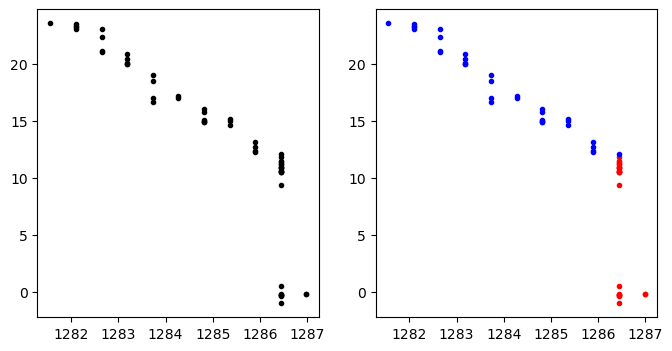

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

fit_params2['HB_height_prom']=fit_params2['Diad2_prom']/fit_params2['HB2_prom']
var4='HB_height_prom'
ax1.plot(fit_params2[var1], fit_params2[var4],  '.k')
lim_1=12
grp1=fit_params2[var4]<lim_1
fit_params2_notgrp1=fit_params2.loc[~grp1]
ax2.plot(fit_params2[var1].loc[grp1], fit_params2[var4].loc[grp1],  '.r')
ax2.plot(fit_params2[var1].loc[~grp1], fit_params2[var4].loc[~grp1],  '.b')
print('Grp1, N=' + str(sum(grp1)))


(1230.0, 1450.0)

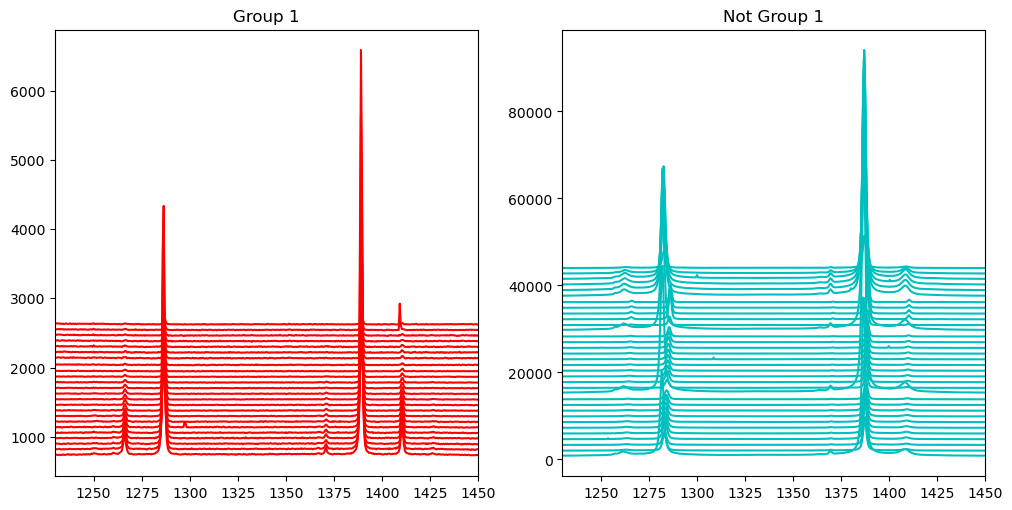

In [84]:
import matplotlib.pyplot as plt
## Find ones in group1, in dataframe and numpy form
Group1_df=fit_params.loc[grp1]
index_Grp1=Group1_df.index+1
Group1_np_y=all_data[:, index_Grp1]

# 

Groupnot1_df=fit_params.loc[~grp1]
index_Grpnot1=Groupnot1_df.index+1
Groupnot1_np_y=all_data[:, index_Grpnot1]
np_x=all_data[:, 0]
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 0.1*len(fit_params2)), sharex=True)
intc=8
for i in range(0, np.shape(Group1_np_y)[1]):
    av_prom_Group1=np.abs(np.nanmedian(Group1_df['Diad1_prom'])/intc)
    ax0.plot(np_x, Group1_np_y[:, i]+av_prom_Group1*i, '-r') 
    
for i in range(0, np.shape(Groupnot1_np_y)[1]):    
    av_prom_Groupnot1=np.abs(np.nanmedian(Groupnot1_df['Diad1_prom'])/intc)
    ax1.plot(np_x, Groupnot1_np_y[:, i]+av_prom_Groupnot1*3*i, '-c') 


#ax1.set_ylim([0, av_prom*i])
ax0.set_title('Group 1')
ax1.set_title('Not Group 1')
ax1.set_xlim([1230, 1450])

## Now lets subdivide the denser ones

Grp2, N=26
Grp3, N=8


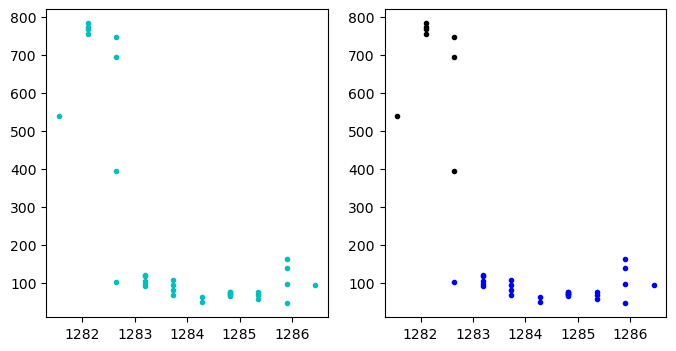

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

var_d='C13_prom'
ax1.plot(fit_params2_notgrp1[var1], fit_params2_notgrp1[var_d],  '.c')
lim_2=250
grp2=(fit_params2[var_d]<lim_2)&(~grp1)
grp3=(fit_params2[var_d]>=lim_2)&(~grp1)
ax2.plot(fit_params2[var1].loc[grp2], fit_params2[var_d].loc[grp2],  '.b')
ax2.plot(fit_params2[var1].loc[grp3], fit_params2[var_d].loc[grp3],  '.k')
print('Grp2, N=' + str(sum(grp2)))
print('Grp3, N=' + str(sum(grp3)))


(1230.0, 1450.0)

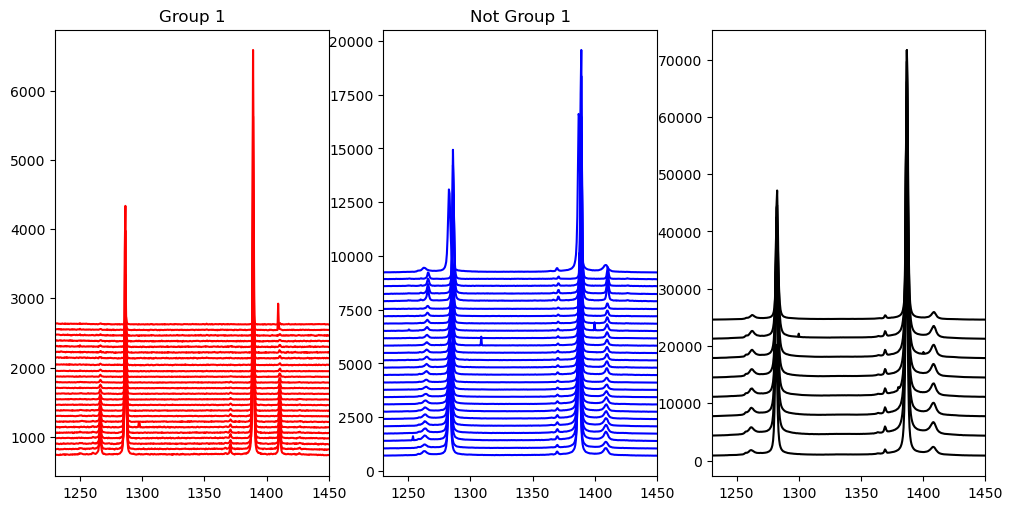

In [86]:
import matplotlib.pyplot as plt
## Find ones in group1, in dataframe and numpy form
Group1_df=fit_params.loc[grp1]
index_Grp1=Group1_df.index+1
Group1_np_y=all_data[:, index_Grp1]

Group2_df=fit_params.loc[grp2]
index_Grp2=Group2_df.index+1
Group2_np_y=all_data[:, index_Grp2]

Group3_df=fit_params.loc[grp3]
index_Grp3=Group3_df.index+1
Group3_np_y=all_data[:, index_Grp3]


np_x=all_data[:, 0]

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 0.1*len(fit_params2)), sharex=True)
intc=8
for i in range(0, np.shape(Group1_np_y)[1]):
    av_prom_Group1=np.abs(np.nanmedian(Group1_df['Diad1_prom'])/intc)
    ax0.plot(np_x, Group1_np_y[:, i]+av_prom_Group1*i, '-r') 
    
for i in range(0, np.shape(Group2_np_y)[1]):
    av_prom_Group2=np.abs(np.nanmedian(Group2_df['Diad1_prom'])/intc)
    ax1.plot(np_x, Group2_np_y[:, i]+av_prom_Group2*i, '-b') 
    
for i in range(0, np.shape(Group3_np_y)[1]):
    av_prom_Group3=np.abs(np.nanmedian(Group3_df['Diad1_prom'])/intc)
    ax2.plot(np_x, Group3_np_y[:, i]+av_prom_Group3*i, '-k') 
 

#ax1.set_ylim([0, av_prom*i])
ax0.set_title('Group 1')
ax1.set_title('Not Group 1')
ax1.set_xlim([1230, 1450])

## Now lets save these lists, and we load them in another notebook

In [88]:
import joblib

# Dumps dataframes
joblib.dump(Group1_df, 'Group1_df.sav')
joblib.dump(Group2_df, 'Group2_df.sav')
joblib.dump(Group3_df, 'Group3_df.sav')
# Dumps actual nupmy data

joblib.dump(Group1_np_y, 'Group1_np.sav')
joblib.dump(Group2_np_y, 'Group2_np.sav')
joblib.dump(Group3_np_y, 'Group3_np.sav')
joblib.dump(np_x, 'np_x.sav')

['np_x.sav']